# Laboratorio 6
### Analítica de Redes Sociales

### Integrantes
|      Nombre     | Carnet |
|:---------------:|:------:|
| André Rodríguez |  18332 |
|   Cesar Rodas   |  16776 |
|  Javier Ramirez |  18099 |


## Importacion de Librerias

Se importan las librerias para la lectura de archivos y el analisis de datos.

In [50]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Lectura de archivos

Se cargan los archivos csv con datos preprocesados.

In [51]:
clean_tweets = pd.read_csv("clean_twdt.csv")
clean_trafico = pd.read_csv("clean_trafico.csv")
clean_transito = pd.read_csv("clean_transito.csv")

## Funciones para el analisis

Funciones para obtener los n items mas frecuentes.



In [52]:
def get_dataset_frequency(dataset,column_name,separator):
  dataset[column_name] = dataset[column_name].astype(str)

  categories = [line.split(separator) for line in dataset[column_name]]

  categories = [y for x in categories for y in x]

  freq = dict(Counter(categories))

  sorted_freq = sorted(freq.items(), key=lambda x:x[1])

  return sorted_freq

In [53]:
def show_dataset_frequency(dataset,column_name,separator,limit=10):
  dataset[column_name] = dataset[column_name].astype(str)

  categories = [line.split(separator) for line in dataset[column_name]]

  categories = [y for x in categories for y in x]

  freq = dict(Counter(categories))

  sorted_freq = sorted(freq.items(), key=lambda x:x[1])

  for x in range(1,limit+1):
    item = sorted_freq[len(sorted_freq)-x]
    print(str(x) + ". " + item[0] + " => " + str(item[1]))

In [72]:
def get_hour_frequencies(dataset,column_name):
  date_info = dataset[column_name]

  times = []
  for date in date_info:
    date = date.split(" ")[3].split(":")[0]
    times.append(date)

  freq = dict(Counter(times))
  sorted_freq = sorted(freq.items(), key=lambda x:x[1])

  return sorted_freq

## Analisis Hashtag TraficoGT

Se obtienen las columnas importantes del dataframe que tiene los datos para el hashtag Trafico. En este caso, las columnas son:
- Text: Tienen la informacion del tweet
- Screen Name: Nombre del usuario que posteo o hizo retweet al post
- Created At: Informacion de la fecha y hora del tweet
- Favorites: Cuantas personas guardaron este tweet como favorito
- Retweets: Cuantas personas compartieron este tweet a otras personas
- Tweet Type: Si este tweet fue posteado por la persona o solamente lo compartio

In [54]:
trafico_ds = clean_trafico[['Screen Name','Text','Created At','Favorites','Retweets','Tweet Type']]
# Validaciones a las columnas
trafico_ds['Screen Name'] = trafico_ds['Screen Name'].astype(str)
trafico_ds['Text'] = trafico_ds['Text'].astype(str)
trafico_ds['Created At'] = trafico_ds['Created At'].astype(str)
trafico_ds['Favorites'] = trafico_ds['Favorites'].astype(int)
trafico_ds['Retweets'] = trafico_ds['Retweets'].astype(int)
trafico_ds['Tweet Type'] = trafico_ds['Tweet Type'].astype(str)

trafico_ds[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Screen Name,Text,Created At,Favorites,Retweets,Tweet Type
0,edu_vf66,rt niachapina ojo vean fraguando congreso pila...,Tue Sep 07 00:19:50 +0000 2021,0,0,Retweet
1,Celso_Gordillo,rt niachapina ojo vean fraguando congreso pila...,Mon Sep 06 23:40:46 +0000 2021,0,0,Retweet
2,MiguelOswaldo2,rt niachapina ojo vean fraguando congreso pila...,Mon Sep 06 23:36:15 +0000 2021,0,0,Retweet
3,SBHernandezZ,rt niachapina ojo vean fraguando congreso pila...,Mon Sep 06 23:21:47 +0000 2021,0,0,Retweet
4,transdocnoticia,traficogt ingreso bulevar sur san cristóbal km...,Mon Sep 06 22:57:43 +0000 2021,0,0,Tweet
5,MovilidadNews,cada vez tráfico obliga personas viven municip...,Mon Sep 06 22:21:51 +0000 2021,0,0,Tweet
6,TransmetroGuate,actualización línea habilita recorrido normal ...,Mon Sep 06 22:13:51 +0000 2021,1,0,Reply
7,JoshuaGnXN,rt niachapina ojo vean fraguando congreso pila...,Mon Sep 06 22:10:20 +0000 2021,0,0,Retweet
8,transdocnoticia,guatemala traficogt eegsa suspenderá servicio ...,Mon Sep 06 21:54:56 +0000 2021,1,0,Tweet
9,BYRONVILLAGRAN,rt niachapina ojo vean fraguando congreso pila...,Mon Sep 06 21:04:18 +0000 2021,0,0,Retweet


**Obtención de los 10 usuarios mas frecuentes en el dataset**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


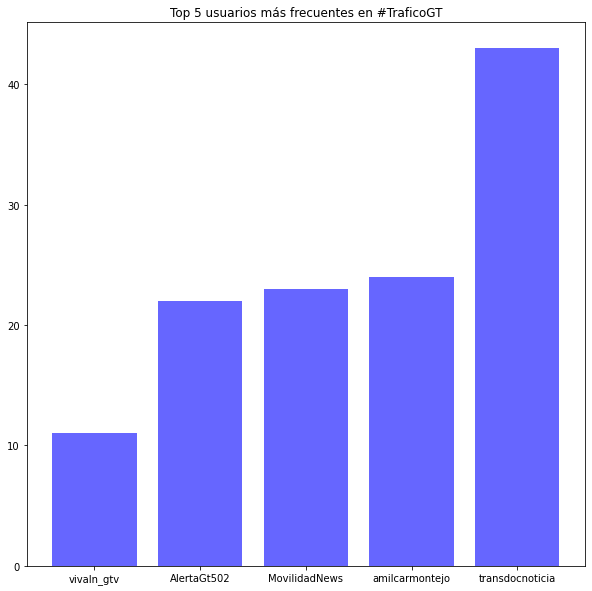

In [60]:
top_trafico_users = get_dataset_frequency(trafico_ds,'Screen Name','\t')
top_trafico_users = top_trafico_users[len(top_trafico_users)-5:]

labels = [x[0] for x in top_trafico_users]
frequencies = [x[1] for x in top_trafico_users]

plt.figure(figsize=(10,10))
plt.bar(labels,frequencies,color=(0.4,0.4,1.0))
plt.title("Top 5 usuarios más frecuentes en #TraficoGT")
plt.show()

En este caso, los cinco usuarios más frecuentes con el hashtag TraficoGT. Estos cinco canales (vivaln_gtv, AlertaGt502, MovilidadNews, amilcarmontrejo, transdocnoticia) se especializan en dar noticias acerca del tráfico y accidentes en el país, lo que podría indicar que la cantidad de accidentes no ha disminuidio mucho a pesar de estar en tiempos de pandemia.

**Obtención de las diez palabras más repetidas en los tweets**

In [56]:
show_dataset_frequency(trafico_ds,'Text',' ',10)

1. traficogt => 425
2. rt => 324
3. zona => 207
4. transitogt => 191
5. amilcarmontejo => 149
6. ciudad => 132
7. tráficogt => 119
8. guatemala => 106
9. quetzal => 99
10. agosto => 89


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


En este caso, las palabras más frecuentes son el hashtag y palabras que tienen que ver con ubicaciones, como es el caso de "ciudad", "guatemala" y "zona". Esto nuevamente da un indicio de que los accidentes o el tráfico no ha dismninuido.

**Obtención de 5 horas más frecuentes**

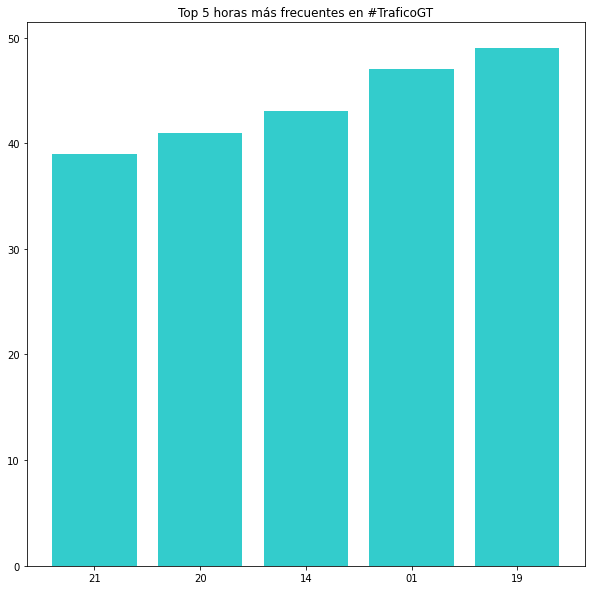

In [76]:
trafico_dates = get_hour_frequencies(trafico_ds,'Created At')
trafico_dates = trafico_dates[len(trafico_dates)-5:]

labels = [x[0] for x in trafico_dates]
frequencies = [x[1] for x in trafico_dates]

plt.figure(figsize=(10,10))
plt.bar(labels,frequencies,color=(0.2,0.8,0.8))
plt.title("Top 5 horas más frecuentes en #TraficoGT")
plt.show()

Las 5 horas mas frecuentes en donde se utiliza el hashtag TraficoGT son:
- 7 pm
- 1 am
- 2 pm
- 8 pm
- 9 pm
En estas horas resaltan las 7 pm y 2 pm, ya que por lo general son horas de salida del trabajo y horas de almuerzo respectivamente para muchos guatemaltecos. Es posible que durante estos congestionamientos pueda ocurrir algun accidente.

**Tipos de tweets**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


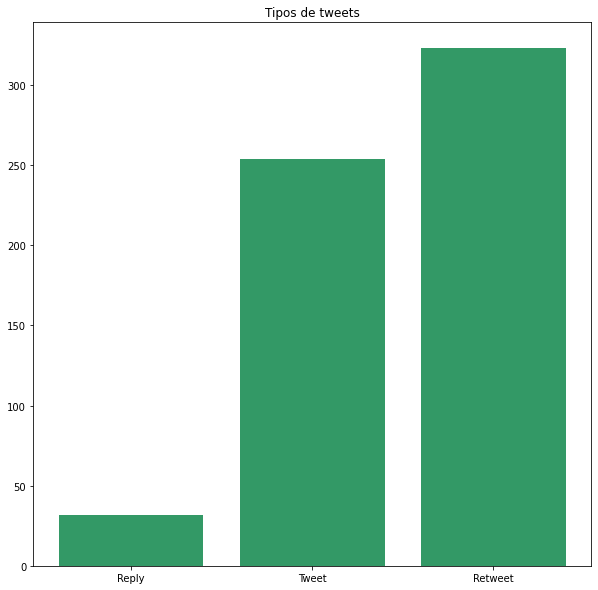

In [86]:
top_trafico_types = get_dataset_frequency(trafico_ds,'Tweet Type','\t')

labels = [x[0] for x in top_trafico_types]
frequencies = [x[1] for x in top_trafico_types]

plt.figure(figsize=(10,10))
plt.bar(labels,frequencies,color=(0.2,0.6,0.4))
plt.title("Tipos de tweets")
plt.show()

El tipo de tweets mas frecuente es el de tipo retweets. Esto quiere decir que hay mas gente compartiendo estos tweets que posteando. Esto podria ser un indicio de que la gente comparte esta informacion a sus amigos y familiares para intentar evitar algun congestionamiento. La minoria de estos tweets fueron respuestas a algun otro tweet.

## Analisis Conjunto TransitoGT

En esta seccion se analiza el conjunto de tweets con hashtag TransitoGT. En este caso, al igual que con el dataset TraficoGT, las columnas son:
- Text: Tienen la informacion del tweet
- Screen Name: Nombre del usuario que posteo o hizo retweet al post
- Created At: Informacion de la fecha y hora del tweet
- Favorites: Cuantas personas guardaron este tweet como favorito
- Retweets: Cuantas personas compartieron este tweet a otras personas
- Tweet Type: Si este tweet fue posteado por la persona o solamente lo compartio

In [80]:
transito_ds = clean_transito[['Screen Name','Text','Created At','Favorites','Retweets','Tweet Type']]
# Validaciones a las columnas
transito_ds['Screen Name'] = transito_ds['Screen Name'].astype(str)
transito_ds['Text'] = transito_ds['Text'].astype(str)
transito_ds['Created At'] = transito_ds['Created At'].astype(str)
transito_ds['Favorites'] = transito_ds['Favorites'].astype(int)
transito_ds['Retweets'] = transito_ds['Retweets'].astype(int)
transito_ds['Tweet Type'] = transito_ds['Tweet Type'].astype(str)

transito_ds[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Screen Name,Text,Created At,Favorites,Retweets,Tweet Type
0,mompirris27,rt notiatlantico hechosgt accidente transitogt...,Mon Sep 06 20:32:16 +0000 2021,0,0,Retweet
1,Leosanchez1988,rt niachapina hoy pm atentos puede llevar cabo...,Mon Sep 06 19:37:32 +0000 2021,0,0,Retweet
2,KaryHuertas,rt notiatlantico hechosgt accidente transitogt...,Mon Sep 06 19:01:45 +0000 2021,0,0,Retweet
3,cesarde98629408,rt notiatlantico hechosgt accidente transitogt...,Mon Sep 06 18:13:38 +0000 2021,0,0,Retweet
4,Noti_Atlantico,hechosgt accidente transitogt carreteraalatlán...,Mon Sep 06 18:10:07 +0000 2021,18,4,Tweet
5,Luisa36956804,rt amilcarmontejo brinda apoyo vial bulevar ju...,Mon Sep 06 17:31:07 +0000 2021,0,0,Retweet
6,amilcarmontejo,brinda apoyo vial bulevar juan pablo ii calle ...,Mon Sep 06 17:21:21 +0000 2021,14,2,Tweet
7,MovilidadNews,rt amilcarmontejo grua desperfectos mecánicos ...,Mon Sep 06 17:19:20 +0000 2021,0,0,Retweet
8,amilcarmontejo,periférico calle zona camión fallas mecánicas ...,Mon Sep 06 17:17:31 +0000 2021,6,0,Tweet
9,amilcarmontejo,automóvil averiado retirándolo calle avenida z...,Mon Sep 06 17:14:33 +0000 2021,18,1,Tweet


**10 palabras mas frecuentes en el dataset**

In [81]:
top_transito_words = show_dataset_frequency(transito_ds,'Text',' ',10)

1. rt => 346
2. transitogt => 337
3. traficogt => 186
4. zona => 176
5. amilcarmontejo => 143
6. tránsitogt => 140
7. guatemala => 109
8. ciudad => 93
9. quetzal => 90
10. accidente => 89


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Muchas de las palabras que aparecen en tweets con este hashtag tambien aparecen en el conjunto de tweets con el hashtag TraficoGT. Sin embargo, en este conjunto de datos, la 10ma palabra mas repetida es la de "accidente". Esto indica que este hashtag se uso repetidas veces para reportar un accidente, lo que a su vez indica que el numero de accidentes no ha cesado. Esto sin embargo no nos indica si cada uno de los accidentes fue distinto o si algunos de ellos fueron para el mismo accidente.

**Tipos de tweets**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


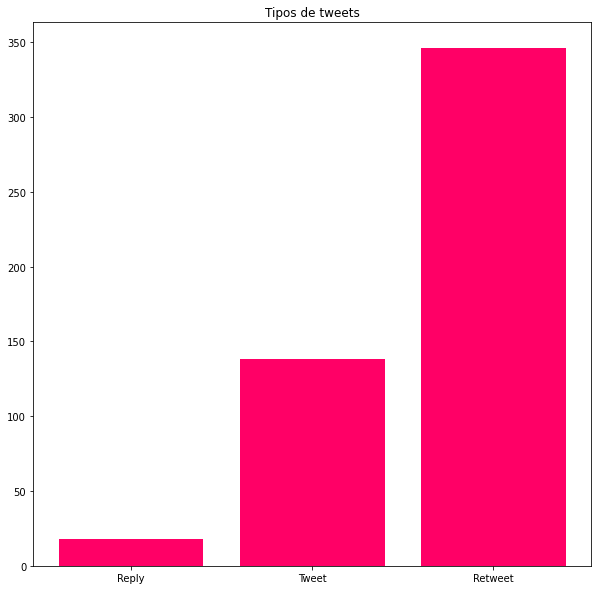

In [85]:
top_transito_types = get_dataset_frequency(transito_ds,'Tweet Type',' ')

labels = [x[0] for x in top_transito_types]
frequencies = [x[1] for x in top_transito_types]

plt.figure(figsize=(10,10))
plt.bar(labels,frequencies,color=(1.0,0.0,0.4))
plt.title("Tipos de tweets")
plt.show()

En este conjunto de datos, se puede ver que la mayoria de tweets fueron de tipo retweet. Esto indica que probablemente la gente intento correr la voz. La minoria de estos tweets fueron posteados originalmente. Esto contrasta bastante con el conjunto de datos del conjunto anterior.

**Horas mas frecuentes**

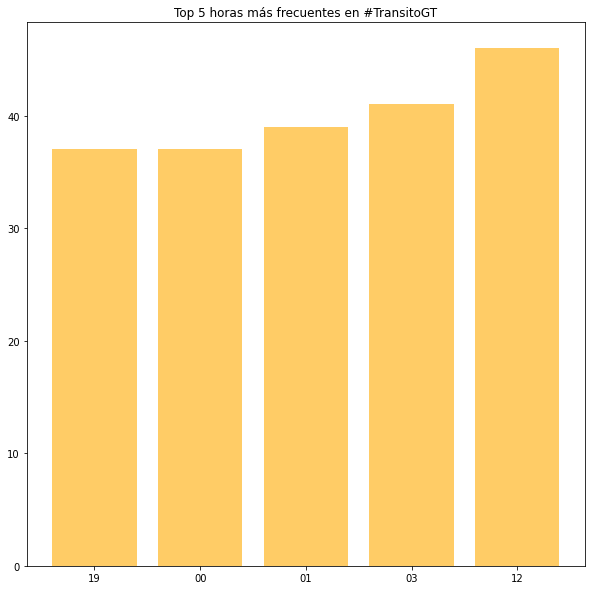

In [88]:
transito_dates = get_hour_frequencies(transito_ds,'Created At')
transito_dates = transito_dates[len(transito_dates)-5:]

labels = [x[0] for x in transito_dates]
frequencies = [x[1] for x in transito_dates]

plt.figure(figsize=(10,10))
plt.bar(labels,frequencies,color=(1.0,0.8,0.4))
plt.title("Top 5 horas más frecuentes en #TransitoGT")
plt.show()

En este conjunto de tweets, las horas mas frecuentes fueron las 12pm (medio dia), las 3pm, 1pm, 12am (media noche) y 7pm. Estos datos indican lo siguiente:
- Las 7pm coincide con el conjunto de tweets de Trafico GT, lo que podria indicar que alrededor de las 7 es cuando ocurren la mayor cantidad de accidentes. 
- La 1pm y 3pm son horas cercanas a las 2pm igualmenet del conjunto de tweets de TraficoGT lo que indica que alrededor de la hora de almuerzo es donde ocurren la mayor cantidad de accidentes.